# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count=combined_df["Mouse ID"].value_counts()
num_mice=len(mice_count)
num_mice

249

In [3]:
# Reference https://www.statology.org/pandas-loc-multiple-columns/
# Reference https://github.com/Salllym/Pymaceuticals_Analysis/blob/main/Pymaceuticals/pymaceuticals_starter.ipynb
# Our data should be uniquely identified by Mouse ID and Timepoint
uniquly=combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
uniquly

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
unique_df=combined_df.loc[combined_df["Mouse ID"]=="g989",:]
unique_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
cleaned_df=combined_df[combined_df["Mouse ID"].isin(uniquly)==False]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
#Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# Checking the number of mice in the clean DataFrame.
num_mice2=cleaned_df["Mouse ID"].value_counts()
mice_total=len(num_mice2)
mice_total

248

In [7]:
cleaned_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_mean=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Drug_median=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Drug_variance=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Drug_std=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Drug_sem=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_df=pd.DataFrame({"Mean Tumor Volume":Drug_mean,
                     "Median Tumor Volume":Drug_median,
                     "Variance Tumor Volume":Drug_variance,
                     "Standard Deviation Tumor Volume":Drug_std,
                     "SEM Tumor Volume":Drug_sem})
drug_df.head()

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Drug_describe=cleaned_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
Drug_describe

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

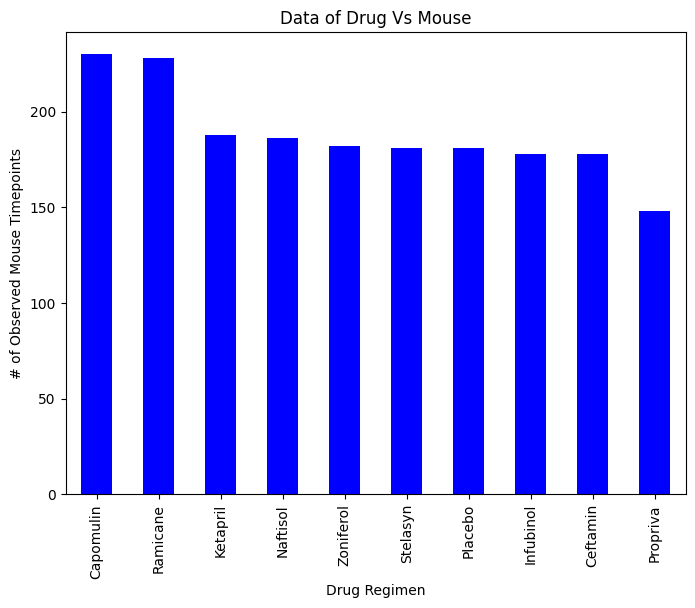

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Reference https://www.educative.io/answers/how-to-make-bar-graphs-using-pandas
num_mouse=cleaned_df["Drug Regimen"].value_counts()
num_mouse
num_mouse.plot.bar(color="blue",figsize=(8,6),xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints",title="Data of Drug Vs Mouse")
plt.show()

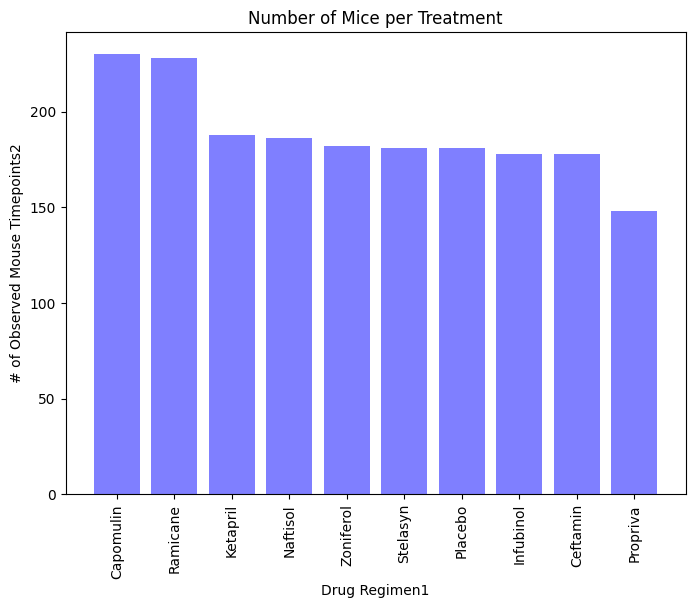

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html

mouse_num3=cleaned_df["Drug Regimen"].value_counts()
mouse_num3
x_axis=mouse_num3.index.values
y_axis=mouse_num3.values
tick_locations=[value for value in x_axis]
plt.figure(figsize=(8,6))
plt.bar(x_axis,y_axis, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations,x_axis, rotation="vertical")
plt.xlabel("Drug Regimen1"),
plt.ylabel("# of Observed Mouse Timepoints2"),
plt.xticks(rotation="vertical"),
plt.title("Number of Mice per Treatment"),
plt.show()

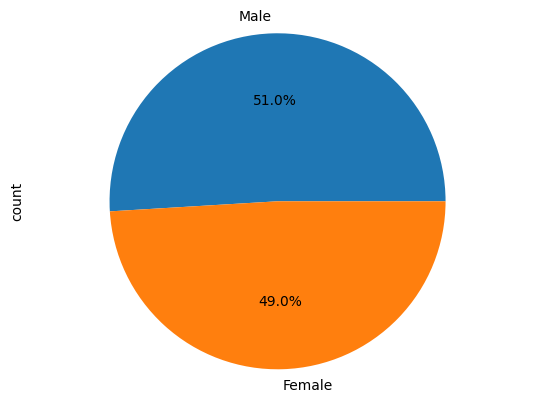

Sex
Male      958
Female    922
Name: count, dtype: int64

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_dis_pie=cleaned_df["Sex"].value_counts()
sex_dis_pie.plot.pie(autopct="%1.1f%%",y="Sex",)
plt.axis("equal")
plt.show()
sex_dis_pie

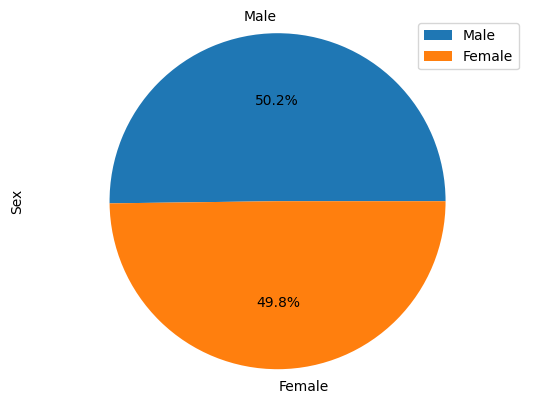

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
df=pd.DataFrame({"Sex":[50.20,49.79]},
               index=["Male","Female"])
df.plot.pie(autopct="%1.1f%%",subplots=True)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#  Start by getting the last (greatest) timepoint for each mouse
df=cleaned_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merged=pd.merge(df,cleaned_df, on=["Mouse ID","Timepoint"],how="left")
print(new_merged.head())
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]
for x in range(len(treatments)):
    tumor=new_merged[new_merged["Drug Regimen"]==treatments[x]]
#     print(tumor.head())


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
2     a262         45           70.717621                 4      Placebo   
3     a275         45           62.999356                 3     Ceftamin   
4     a366         30           63.440686                 1     Stelasyn   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female          17          29  
3  Female          20          28  
4  Female          16          29  


In [80]:
# Put treatments into a list for for loop (and later for plot labels)
Regimen_treat=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume={"Capomulin":[],
             "Ramicane":[],
             "Infubinol":[],
             "Ceftamin":[]}
final_tumor_volume={"Capomulin":[],
             "Ramicane":[],
             "Infubinol":[],
             "Ceftamin":[]}
#treatment loops
for treat in Regimen_treat:
#data loop for volume
    for i in new_merged.index:
        if new_merged.iloc[i]["Drug Regimen"]==treat:
           tumor_volume[treat].append(new_merged.iloc[i]["Tumor Volume (mm3)"])
volume_df=pd.DataFrame(tumor_volume)
volume_df
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treat in Regimen_treat:
# add subset 
    subset=new_merged[new_merged["Drug Regimen"]==treat]
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    firstQuartile = quartiles[0.25]
    secondQuartile = quartiles[0.5]
    thirdQuartile = quartiles[0.75]
    iqr = thirdQuartile - firstQuartile
#outlier boundaries
    lowerBound = firstQuartile - (1.5*iqr)
    upperBound = thirdQuartile + (1.5 *iqr)
 # Determine outliers using upper and lower bounds 
outliers = new_merged.loc[(new_merged['Tumor Volume (mm3)'] <= lowerBound) | (new_merged['Tumor Volume (mm3)'] >= upperBound)]
print(outliers)   
# Locate the rows which contain mice on each drug and get the tumor volumes

    
    

    
   


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
96      k403         45           22.050126                 1     Ramicane   
174     s185         45           23.343598                 1    Capomulin   

        Sex  Age_months  Weight (g)  
96     Male          21          16  
174  Female           3          17  


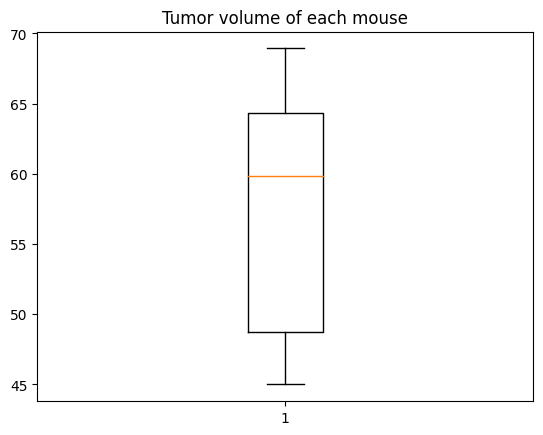

In [82]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume of each mouse')
ax1.boxplot(subset['Tumor Volume (mm3)'], flierprops=box_plot)
plt.show()

## Line and Scatter Plots

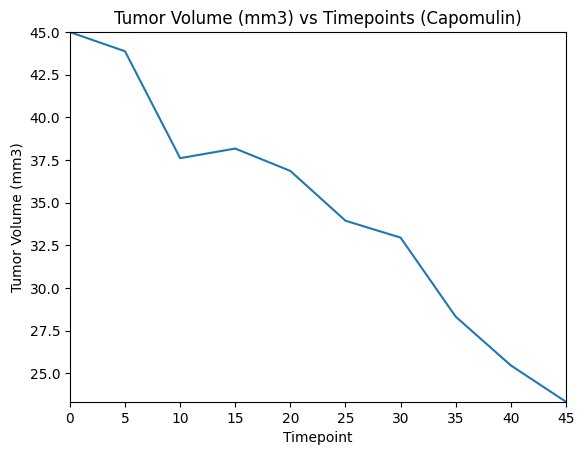

In [88]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse=cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
mouse_treated=capomulin_mouse.loc[capomulin_mouse["Mouse ID"]=="s185"]

#Timepoints
timepoints = [0,5,10,15,20,25,30,35,40,45]
#Chart labels
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
#chart limits
plt.xlim(0,45)
plt.ylim(mouse_treated['Tumor Volume (mm3)'].min(),mouse_treated['Tumor Volume (mm3)'].max())
#Chart titles
plt.title('Tumor Volume (mm3) vs Timepoints (Capomulin)')
#chart plot
plt.plot(mouse_treated['Timepoint'],mouse_treated['Tumor Volume (mm3)'])

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
